In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('heart_disease.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
5,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
6,65,1,4,150,236,1,1,105,1,0,?,?,?,3
7,60,1,3,180,0,0,1,140,1,1.5,2,?,?,0
8,60,1,3,120,0,?,0,141,1,2,1,?,?,3
9,60,1,2,160,267,1,1,157,0,0.5,2,?,?,1


In [3]:
df.shape

(200, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

    No null values

In [6]:
df.describe()

,age,sex,cp,restecg,num
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


In [7]:
df['ca'].value_counts()

?    198
0      2
Name: ca, dtype: int64

In [8]:
df['thal'].value_counts()

?    166
7     22
6      8
3      4
Name: thal, dtype: int64

In [9]:
df['slope'].value_counts()

?    102
2     53
3     29
1     16
Name: slope, dtype: int64

In [10]:
df['trestbps'].value_counts()

?      56
120    16
130    15
140    10
150     9
110     9
160     8
122     6
142     5
128     4
136     4
126     4
124     4
170     4
134     4
144     4
132     3
158     3
104     2
116     2
152     2
154     2
138     2
112     2
180     2
155     2
125     2
96      1
100     1
156     1
114     1
146     1
0       1
102     1
190     1
106     1
178     1
135     1
118     1
127     1
172     1
Name: trestbps, dtype: int64

In [11]:
df['chol'].value_counts()

0      49
?       7
220     4
203     4
258     4
       ..
264     1
333     1
306     1
192     1
273     1
Name: chol, Length: 100, dtype: int64

In [12]:
df['fbs'].value_counts()

0    125
1     68
?      7
Name: fbs, dtype: int64

In [13]:
df['thalach'].value_counts()

?      53
140    12
120    12
110     8
130     6
112     6
100     4
118     4
160     4
150     4
128     4
105     4
102     3
108     3
122     3
84      3
86      3
135     3
106     3
117     3
148     3
125     3
180     2
96      2
80      2
119     2
127     2
129     2
154     2
98      2
111     2
138     2
165     2
157     1
97      1
141     1
123     1
107     1
93      1
126     1
149     1
69      1
88      1
161     1
113     1
132     1
159     1
133     1
145     1
162     1
121     1
151     1
115     1
155     1
94      1
124     1
131     1
99      1
144     1
73      1
Name: thalach, dtype: int64

In [14]:
df['exang'].value_counts()

1    95
?    53
0    52
Name: exang, dtype: int64

In [15]:
df['oldpeak'].value_counts()

?       56
0       40
2       25
1.5     21
1       18
3       13
2.5      9
0.5      7
4        4
1.3      2
1.6      1
0.8      1
-0.5     1
3.5      1
1.7      1
Name: oldpeak, dtype: int64

In [16]:
#Replacing '?' with nan
df1=df.replace('?',np.NaN)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  144 non-null    object
 4   chol      193 non-null    object
 5   fbs       193 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   147 non-null    object
 8   exang     147 non-null    object
 9   oldpeak   144 non-null    object
 10  slope     98 non-null     object
 11  ca        2 non-null      object
 12  thal      34 non-null     object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [18]:
df1.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

In [19]:
df1=df1.astype('float64')

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    float64
 1   sex       200 non-null    float64
 2   cp        200 non-null    float64
 3   trestbps  144 non-null    float64
 4   chol      193 non-null    float64
 5   fbs       193 non-null    float64
 6   restecg   200 non-null    float64
 7   thalach   147 non-null    float64
 8   exang     147 non-null    float64
 9   oldpeak   144 non-null    float64
 10  slope     98 non-null     float64
 11  ca        2 non-null      float64
 12  thal      34 non-null     float64
 13  num       200 non-null    float64
dtypes: float64(14)
memory usage: 22.0 KB


# Converting all the values of 'num' other than 0 to 1

In [21]:
df1['num']=df['num'].mask(df1['num']>1,1)

As we have to classify between 0 and not 0 so we are converting the values other than 0 into 1

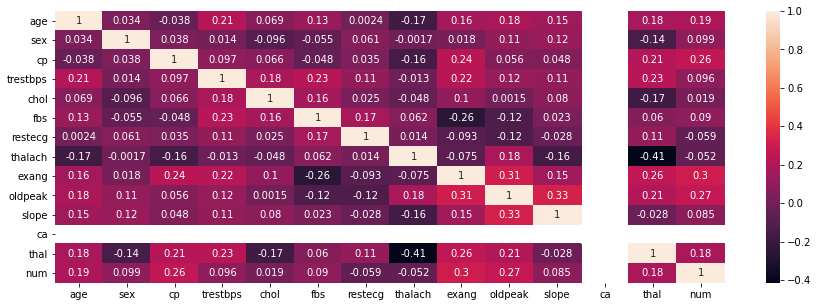

In [22]:
corr=df1.corr()
plt.figure(figsize=(15,5))
sn.heatmap(corr,annot=True)

In [23]:
#Dropping ca and thal due to large number of missing values
df1=df1.drop(['ca','thal'],axis=1)

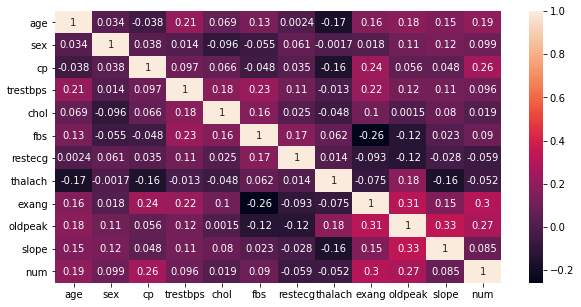

In [24]:
corr=df1.corr()
plt.figure(figsize=(10,5))
sn.heatmap(corr,annot=True)

In [25]:
#Replacing continous data with mean
df1['trestbps'].fillna(df1['trestbps'].mean(),inplace=True)
df1['chol'].fillna(df1['chol'].mean(),inplace=True)
df1['thalach'].fillna(df1['thalach'].mean(),inplace=True)
df1['oldpeak'].fillna(df1['oldpeak'].mean(),inplace=True)

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    float64
 1   sex       200 non-null    float64
 2   cp        200 non-null    float64
 3   trestbps  200 non-null    float64
 4   chol      200 non-null    float64
 5   fbs       193 non-null    float64
 6   restecg   200 non-null    float64
 7   thalach   200 non-null    float64
 8   exang     147 non-null    float64
 9   oldpeak   200 non-null    float64
 10  slope     98 non-null     float64
 11  num       200 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 18.9 KB


In [27]:
df1['slope'].mode()

0    2.0
dtype: float64

In [28]:
df1['exang'].mode()

0    1.0
dtype: float64

In [29]:
df1['fbs'].mode()

0    0.0
dtype: float64

In [30]:
#replacing categorical data with mode
df1['slope'].fillna(df1['slope'].mode()[0],inplace=True)
df1['exang'].fillna(df1['exang'].mode()[0],inplace=True)
df1['fbs'].fillna(df1['fbs'].mode()[0],inplace=True)

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    float64
 1   sex       200 non-null    float64
 2   cp        200 non-null    float64
 3   trestbps  200 non-null    float64
 4   chol      200 non-null    float64
 5   fbs       200 non-null    float64
 6   restecg   200 non-null    float64
 7   thalach   200 non-null    float64
 8   exang     200 non-null    float64
 9   oldpeak   200 non-null    float64
 10  slope     200 non-null    float64
 11  num       200 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 18.9 KB


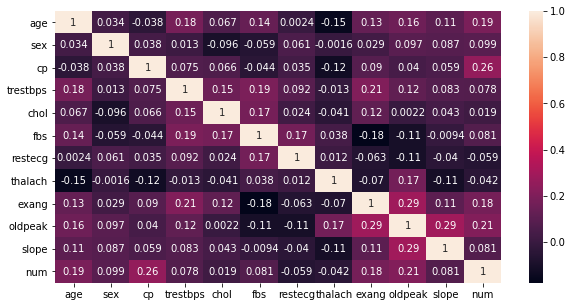

In [32]:
corr=df1.corr()
plt.figure(figsize=(10,5))
sn.heatmap(corr,annot=True)

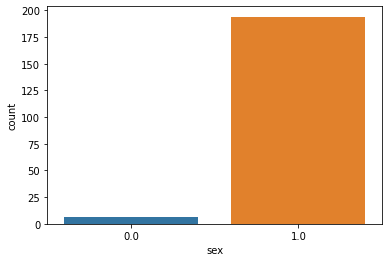

1.0    194
0.0      6
Name: sex, dtype: int64


In [33]:
plt.subplots(figsize=(6,4))
sn.countplot(x='sex',data=df1)
plt.show()

print(df1.sex.value_counts())

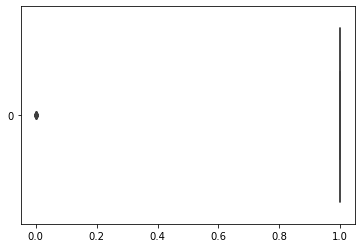

In [34]:
sn.boxplot(data=df1['sex'], orient='h')
plt.show()

In [35]:
df1.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.511363
chol       -0.571879
fbs         0.680636
restecg     0.391463
thalach     0.148515
exang      -1.102593
oldpeak     0.423414
slope       0.210521
num        -1.132724
dtype: float64

In [36]:
#dropping sex as it has very less number of values in 0 which get removed into outlier removal
df1=df1.drop(['sex'],axis=1)

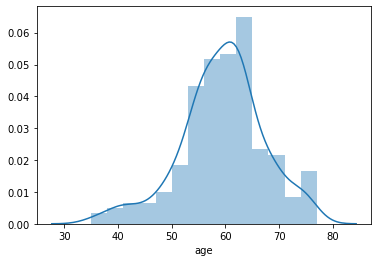

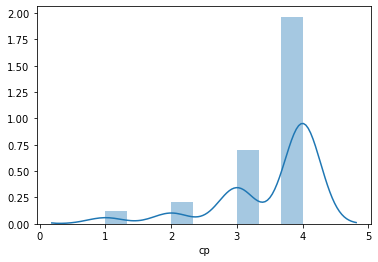

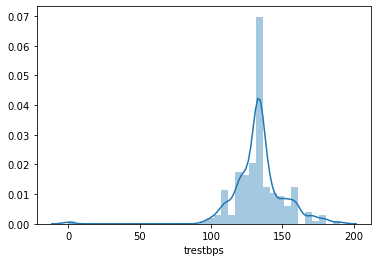

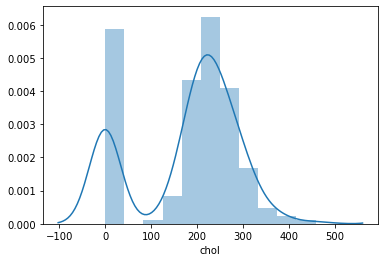

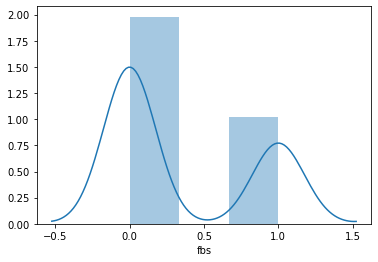

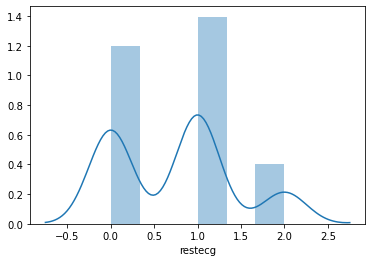

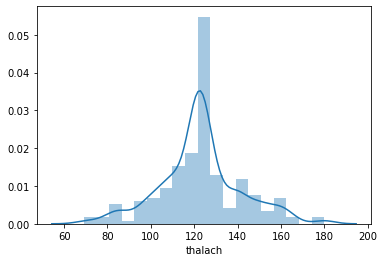

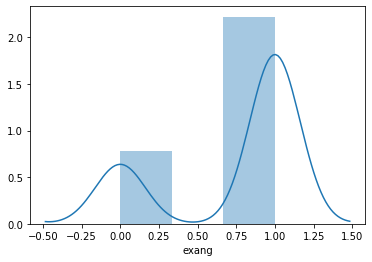

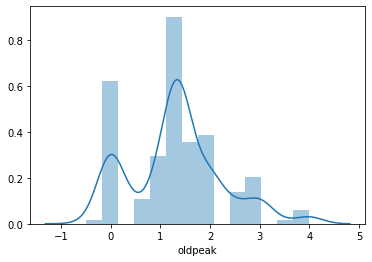

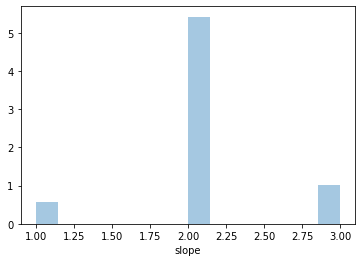

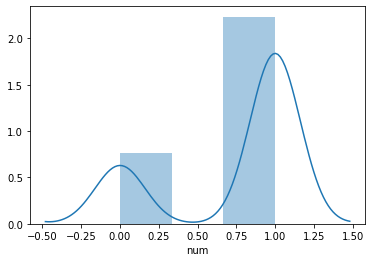

In [37]:
for col in df1.describe().columns:
    sn.distplot(df1[col])
    plt.show()

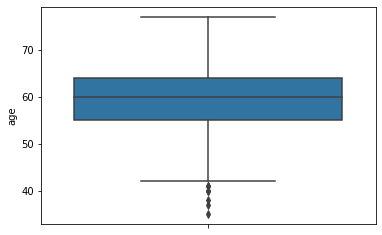

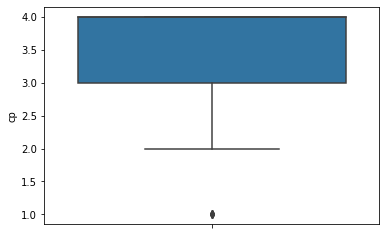

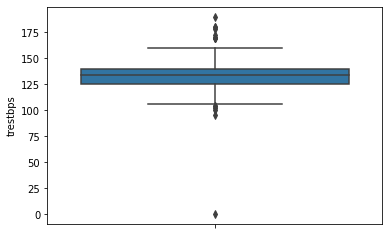

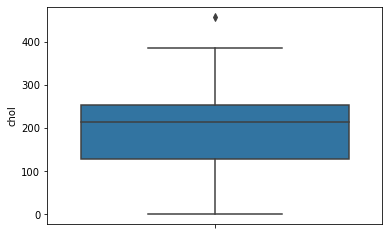

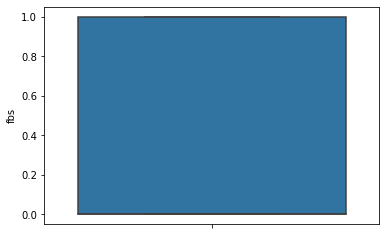

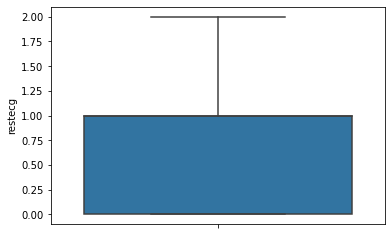

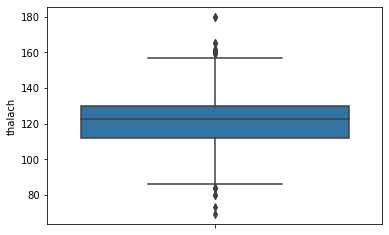

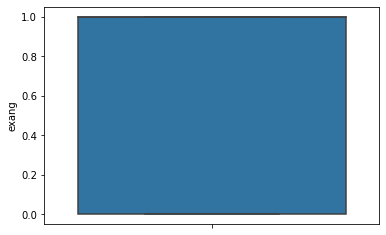

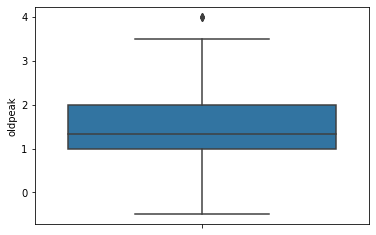

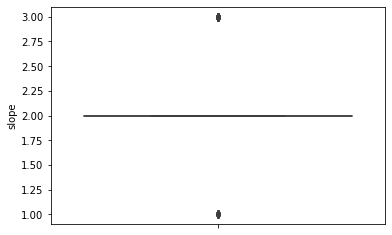

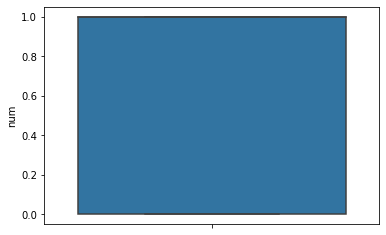

In [38]:
for col in df1.describe().columns:
    sn.boxplot(df1[col],orient='v')
    plt.show()

In [39]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df1))
threshold=3
df2=df1[(z<3).all(axis=1)]

In [40]:
df2.shape, df1.shape

((187, 11), (200, 11))

In [41]:
percentage_removal=((200-187)/200)*100
print(percentage_removal)

6.5


In [42]:
Q1=df1.quantile(0.25)
Q3=df1.quantile(0.75)
IQR=Q3-Q1
df3=df1[~((df1<(Q1 - 1.5*IQR))|(df1>(Q3 + 1.5*IQR))).any(axis=1)]
df3.shape, df1.shape

((125, 11), (200, 11))

In [43]:
df2.skew()

age        -0.328141
cp         -1.413989
trestbps    0.514585
chol       -0.567675
fbs         0.721432
restecg     0.407567
thalach    -0.051536
exang      -1.189161
oldpeak     0.460834
slope       0.248398
num        -1.189161
dtype: float64

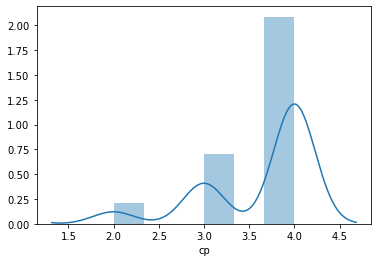

In [44]:
sn.distplot(df2['cp'])
plt.show()

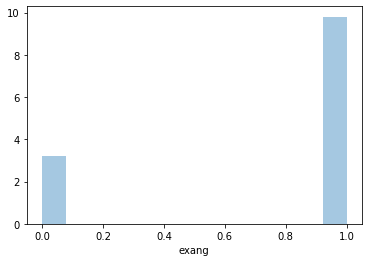

In [45]:
sn.distplot(df2['exang'])
plt.show()

In [46]:
x=df2.drop(['num'],axis=1)
y=df2['num']

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sx=sc.fit_transform(x)

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [52]:
best_rstate=0
accu=0
for i in range(0,1000):
    train_x,test_x,train_y,test_y=train_test_split(sx,y,test_size=0.2,random_state=i)
    svc=SVC(kernel='linear')
    svc.fit(train_x,train_y)
    pred=svc.predict(test_x)
    temp_acc=accuracy_score(test_y,pred)
    if temp_acc>accu:
        accu=temp_acc
        best_rstate=i

print(f'Best accuracy {accu*100} found on random_state {best_rstate}')

Best accuracy 94.73684210526315 found on random_state 113


In [54]:
train_x,test_x,train_y,test_y=train_test_split(sx,y,test_size=0.2,random_state=113)

models=[SVC(),SVC(kernel='linear'),SVC(kernel='poly'),DecisionTreeClassifier(),GaussianNB(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier()]
for v in models:
    v.fit(train_x,train_y)
    predv=v.predict(test_x)
    cvscore=cross_val_score(v,sx,y,cv=10)
    print(v)
    print(accuracy_score(test_y,predv))
    print('cv_score', cvscore.mean())
    print(confusion_matrix(test_y,predv))
    print(classification_report(test_y,predv))
    print('\n')

SVC()
0.9210526315789473
cv_score 0.7698830409356725
[[ 0  2]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.95      0.97      0.96        36

    accuracy                           0.92        38
   macro avg       0.47      0.49      0.48        38
weighted avg       0.90      0.92      0.91        38



SVC(kernel='linear')
0.9473684210526315
cv_score 0.7266081871345029
[[ 0  2]
 [ 0 36]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.95      1.00      0.97        36

    accuracy                           0.95        38
   macro avg       0.47      0.50      0.49        38
weighted avg       0.90      0.95      0.92        38



SVC(kernel='poly')
0.9210526315789473
cv_score 0.7535087719298246
[[ 0  2]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00

In [53]:
best_rstate=0
accu=0
for i in range(0,1000):
    train_x,test_x,train_y,test_y=train_test_split(sx,y,test_size=0.2,random_state=i)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    temp_acc=accuracy_score(test_y,pred)
    if temp_acc>accu:
        accu=temp_acc
        best_rstate=i

print(f'Best accuracy {accu*100} found on random_state {best_rstate}')

Best accuracy 94.73684210526315 found on random_state 216


In [55]:
train_x,test_x,train_y,test_y=train_test_split(sx,y,test_size=0.2,random_state=216)
lg=LogisticRegression()
lg.fit(train_x,train_y)
predlg=lg.predict(test_x)
lgscore=cross_val_score(lg, sx, y, cv=10)
print(accuracy_score(test_y,predlg))
print('cv_score', lgscore.mean())
print(confusion_matrix(test_y,predlg))
print(classification_report(test_y,predlg))

0.9473684210526315
cv_score 0.7695906432748537
[[ 6  1]
 [ 1 30]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.97      0.97      0.97        31

    accuracy                           0.95        38
   macro avg       0.91      0.91      0.91        38
weighted avg       0.95      0.95      0.95        38



In [62]:
parameter={'kernel':['rbf','linear','poly','sigmoid'],'C':[1,10],}

In [63]:
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(SVC(),parameter,cv=10,scoring='accuracy')
gcv.fit(train_x,train_y)
gcv.best_estimator_
gcv_pred=gcv.best_estimator_.predict(test_x)
print('accuracy_score', accuracy_score(test_y,gcv_pred))

accuracy_score 0.8947368421052632


In [ ]:
import pickle
file='heart_disease.pkl'
pickle.dump(gcv,open(file,'wb'))